In [21]:
import os
import pandas as pd
import pathlib
import numpy as np

directory = 'results'
csv_files = os.listdir(directory)
# single change 
single_tranisition_files = [file for file in csv_files if "single" in file]

def single_transition_stats(filepath):
    df = pd.read_csv(filepath)

    if "PAMCTS" in str(filepath):
        df = df.groupby(["masspole","alpha"])["reward"].agg(["mean", "std","count"])
    else:
        df = df.groupby("masspole")["reward"].agg(["mean", "std","count"])
    df["std_err"] = df["std"]/np.sqrt(df["count"])
    return df


def get_csv(filepath):
    df = pd.read_csv(filepath)
    if "PAMCTS" in str(filepath):
        df = df.groupby(["alpha"])["reward"].agg(["mean", "std","count"])
        return df
    mean = df["reward"].mean()
    std_err = df["reward"].std()/np.sqrt(len(df["reward"]))
    return mean, std_err

In [22]:
mcts_files = [file for file in csv_files if "MCTS" in file and "PAMCTS" not in file]
pamcts_files = [file for file in csv_files if "PAMCTS" in file]
ddqn_files = [file for file in csv_files if "DDQN" in file]
alphazero_files = [file for file in csv_files if "AlphaZero" in file]


In [23]:
file = "/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartpoleVanillaMCTS_withoutChangNotif_2024-05-21_21:50:47.csv"

df = pd.read_csv(file)  
df = df.groupby(["polemass","num_iter"])["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

                     mean         std  count    std_err
polemass num_iter                                      
0.1      50        708.08  522.140838     50  73.841865
         100       592.36  264.702818     50  37.434632
         300       660.86  352.724961     50  49.882842
1.0      50        667.90  393.794531     50  55.690957
         100       718.64  480.583649     50  67.964791
         300       600.90  337.124046     50  47.676540
1.2      50        717.70  447.498136     50  63.285793
         100       629.40  337.100845     50  47.673259
         300       595.64  374.513876     50  52.964260
1.3      50        552.68  271.529713     50  38.400100
         100       601.52  353.237692     50  49.955353
         300       552.84  348.475242     50  49.281841
1.5      50        724.84  475.593823     50  67.259123
         100       625.60  313.671738     50  44.359883
         300       641.28  356.845993     50  50.465644


In [24]:
file = "/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartpoleVanillaMCTS_single_transition_withChangNotif_2024-05-22_02:56:49.csv"

df = pd.read_csv(file)
df = df.groupby(["polemass","num_iter"])["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

                     mean         std  count    std_err
polemass num_iter                                      
0.1      50        585.06  326.318575     50  46.148415
         100       742.92  431.881637     50  61.077287
         300       733.84  439.451855     50  62.147877
1.0      50        699.38  330.652595     50  46.761338
         100       711.92  431.756254     50  61.059555
         300       633.62  348.425314     50  49.274780
1.2      50        668.96  344.546431     50  48.726224
         100       794.64  494.867773     50  69.984872
         300       735.52  524.169284     50  74.128731
1.3      50        801.60  530.345171     50  75.002133
         100       813.06  407.793736     50  57.670743
         300       734.08  375.899185     50  53.160173
1.5      50        742.62  411.173328     50  58.148690
         100       826.20  503.788099     50  71.246396
         300       678.58  361.578235     50  51.134884


In [25]:
for file in pamcts_files:
    print(file)
    df = pd.read_csv(os.path.join(directory,file))
    print(df.columns)

CartPole_PAMCTS_continuou_change_update_with_notif_2024-08-13.csv
Index(['sample_id', 'reward', 'experiment_name', 'num_iter', 'total_time',
       'seed', 'c', 'gamma', 'alpha'],
      dtype='object')
CartPole_PAMCTS_IncreasingMass_trial_with_change_notif_2024-05-31.csv
Index(['mass', 'sample_id', 'reward', 'experiment_name', 'num_iter',
       'total_time', 'seed', 'c', 'gamma', 'alpha'],
      dtype='object')
CartPole_PAMCTS_IncreasingMass_trial_1_with_change_notif_2024-05-30.csv
Index(['sample_id', 'reward', 'experiment_name', 'num_iter', 'total_time',
       'seed', 'c', 'gamma', 'alpha'],
      dtype='object')
CartPole_PAMCTS_IncreasingMass_trial_1_with_change_notif_2024-05-31.csv
Index(['sample_id', 'reward', 'experiment_name', 'num_iter', 'total_time',
       'seed', 'c', 'gamma', 'alpha'],
      dtype='object')
CartPole_PAMCTS_IncreasingMass_trial_1_with_change_notif_2024-06-03.csv
Index(['sample_id', 'reward', 'experiment_name', 'num_iter', 'total_time',
       'seed', 'c', '

In [26]:
file = os.path.join(directory,"CartPole_PAMCTS_IncreasingMass_trial_with_change_notif_2024-05-31.csv")
df = pd.read_csv(file)
df = df[df["num_iter"]==300].groupby(["mass","alpha"])["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)


                  mean       std  count   std_err
mass alpha                                       
0.1  0.25   136.066667  3.622574    150  0.295782
     0.50   136.686667  3.485611    150  0.284599
     75.00  136.586667  3.693249    150  0.301553
1.0  0.25   136.013333  3.373777    150  0.275468
     0.50   136.246667  3.367704    150  0.274972
     75.00  135.746667  3.397960    150  0.277442
1.2  0.25   136.260000  3.708199    150  0.302773
     0.50   135.680000  3.048424    150  0.248903
     75.00  136.006667  3.445641    150  0.281335
1.3  0.25   135.360000  2.952146    150  0.241042
     0.50   135.373333  3.197202    150  0.261050
     75.00  135.253333  3.117792    150  0.254567
1.5  0.25   135.146667  3.368601    150  0.275045
     0.50   135.373333  3.004575    150  0.245323
     75.00  135.473333  3.453812    150  0.282003


In [27]:
for file in ddqn_files:
    print(file)

CartPole_DDQN_IncreasingMass_trial_1_2024-05-28.csv
CartPole_DDQN_single_transition_2024-08-13.csv
CartPole_DDQN_continous_change_without_notif_2024-07-31.csv
CartPole_DDQN_continous_change_with_notif_2024-08-15.csv
CartPole_DDQN_single_transition_increasingMass_trial_1_2024-05-30.csv


In [28]:
for file in alphazero_files:
    print(file)

CartPole_AlphaZero_single_change_with_notif_2024-08-15.csv
CartPole_AlphaZero_single_change_without_notif_2024-08-15.csv
CartPole_AlphaZero_continous_change_trial_1_with_change_notif_2024-07-16.csv
CartPole_AlphaZero_single_change_without_notif_trial_1_2024-07-16.csv
CartPole_AlphaZero_single_change_with_notif_big_mass_2024-08-15.csv
CartPole_AlphaZero_single_change_without_notif_trial_1_2024-07-12.csv
CartPole_AlphaZero_single_change_with_notif_trial_1_2024-07-16.csv
CartPole_AlphaZero_continous_change_trial_1_without_change_notif_2024-08-13.csv


In [29]:
file = "/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_AlphaZero_single_change_with_notif_trial_1_2024-07-16.csv"
df = pd.read_csv(file)
df =df.groupby("mass")["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])

print(df)

             mean          std  count    std_err
mass                                            
0.1   1561.673333  1091.499981    150  89.120600
1.0    230.813333    12.939398    150   1.056497
1.2    241.853333    12.448221    150   1.016393
1.3    242.793333    10.042391    150   0.819958
1.5    902.046667  1016.604516    150  83.005411


In [30]:
file = "CartPole_AlphaZero_single_change_without_notif_trial_1_2024-07-16.csv"
file_path = os.path.join(directory, file)
df = pd.read_csv(file_path)
df =df.groupby("mass")["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)


             mean          std  count    std_err
mass                                            
0.1   1608.626667  1080.467321    150  88.219787
1.0    441.653333   636.470374    150  51.967588
1.2    286.060000   317.777585    150  25.946431
1.3    259.300000   185.023842    150  15.107133
1.5    272.820000   260.219837    150  21.246861


In [31]:
f = "CartPole_PAMCTS_single_change_with_change_notif_2024-08-09.csv"
df = pd.read_csv(os.path.join(directory,f))
df = df.groupby(["mass","alpha"])["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

              mean         std  count    std_err
mass alpha                                      
0.1  0.25   595.79  384.549856    100  38.454986
     0.50   122.89    5.035019    100   0.503502
     0.75   136.28    3.162533    100   0.316253
1.0  0.25   740.84  432.304577    100  43.230458
     0.50   123.55    4.676127    100   0.467613
     0.75   136.07    2.910292    100   0.291029
1.5  0.25   702.58  436.056738    100  43.605674
     0.50   124.29    4.725377    100   0.472538
     0.75   135.22    3.027083    100   0.302708


In [32]:
f = "CartPole_PAMCTS_single_change_without_change_notif_2024-08-09.csv"
df = pd.read_csv(os.path.join(directory,f))
df = df.groupby(["mass","alpha"])["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

              mean         std  count    std_err
mass alpha                                      
0.1  0.25   543.17  298.944948    100  29.894495
     0.50   121.85    5.242359    100   0.524236
     0.75   136.01    3.633445    100   0.363344
1.0  0.25   525.98  319.125034    100  31.912503
     0.50   120.48    5.864600    100   0.586460
     0.75   135.41    3.165773    100   0.316577
1.5  0.25   467.35  251.122948    100  25.112295
     0.50   117.60   12.390938    100   1.239094
     0.75   135.42    3.447089    100   0.344709


In [33]:
f = "/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_DDQN_single_transition_increasingMass_trial_1_2024-05-30.csv"
df = pd.read_csv(os.path.join(directory,f))
df = df.groupby(["mass"])["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

            mean       std  count   std_err
mass                                       
0.1   136.606667  3.856306    150  0.314866
1.0   135.533333  3.414668    150  0.278806
1.2   135.853333  3.328516    150  0.271772
1.3   136.026667  3.172759    150  0.259055
1.5   135.193333  3.272207    150  0.267175


In [34]:
# f = "/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_MCTS_IncreasingMass_trial_1_without_notif_2024-05-28.csv"
# df = pd.read_csv(os.path.join(directory,f))
# df = df.groupby(["mass"])["reward"].agg(["mean", "std","count"])
# df["std_err"] = df["std"]/np.sqrt(df["count"])
# print(df)

In [35]:
#contin change fies

contin_change_with_notif = ["CartPole_AlphaZero_continous_change_trial_1_with_change_notif_2024-07-16.csv","CartPole_MCTS_IncreasingMass_trail_1_2024-05-27.csv",""]

df  = pd.read_csv(os.path.join(directory,contin_change_with_notif[1]))
print(df["reward"].mean())
print(df["reward"].std()/np.sqrt(len(df["reward"])))


702.7088888888889
21.953630112180136


In [36]:
df = pd.read_csv("/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_AlphaZero_single_change_without_notif_2024-08-15.csv")
df = df.groupby("mass")["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

        mean         std  count    std_err
mass                                      
1.0   585.13  808.682513    100  80.868251


In [37]:
df = pd.read_csv("/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_AlphaZero_single_change_with_notif_2024-08-15.csv")
df = df.groupby("mass")["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

        mean        std  count   std_err
mass                                    
1.0   232.18  12.992134    100  1.299213


In [38]:
df = pd.read_csv("/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_AlphaZero_single_change_with_notif_big_mass_2024-08-15.csv")
df = df.groupby("mass")["reward"].agg(["mean", "std","count"])
df["std_err"] = df["std"]/np.sqrt(df["count"])
print(df)

        mean          std  count     std_err
mass                                        
1.5   932.49  1031.542529    100  103.154253


In [39]:
df = pd.read_csv("/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_DDQN_continous_change_without_notif_2024-07-31.csv")
print(df["reward"].mean() )
print(df["reward"].std()/np.sqrt(len(df["reward"])))


95.97333333333333
2.676468785606908


In [40]:
df = pd.read_csv("/Users/--/Documents/--/Research/ns_gym/experiments/NS_Cartpole/results/CartPole_DDQN_continous_change_with_notif_2024-08-15.csv")
print(df["reward"].mean() )
print(df["reward"].std()/np.sqrt(len(df["reward"])))

100.78
2.622683189806569


In [43]:
import gymnasium as gym
from PIL import Image

env = gym.make("FrozenLake-v1",render_mode="human")
env.reset()
env.render()

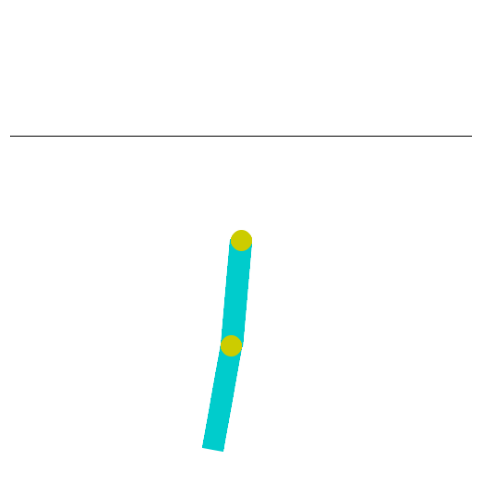

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
from PIL import Image

# Create the FrozenLake environment
env = gym.make("Acrobot-v1", render_mode="rgb_array")

# Reset the environment to the initial state
obs = env.reset()

# Render the environment and capture the output as an image array
image_array = env.render()

# Convert the image array to a PIL image
image = Image.fromarray(image_array)

# Save the image to a PDF using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.savefig("frozenlake_output.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

